# **Datasets Analysis**

In this notebook, we analyze and compare the three different datasets we decided to use:

* MCTS (without Softmax)
* MCTS (with Softmax)
* Random


### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

After generating the datasets with MCTS (using and not using Softmax), we decided to split them into four distinct datasets, one for each game state: root, early, mid, and late; for more in-depth analysis. (In the *Random* dataset, we did the opposite process — we generated them already separated, but merged everything into one to allow for more general analysis)


In [2]:
# Load datasets
mcts_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/mcts_all.csv")
soft_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/soft_all.csv")

# Function to count pieces (X or O) on the board
def count_pieces(row):
    return sum([1 for val in row[:42] if val in ["X", "O"]])

# Count pieces in each row
mcts_df["piece_count"] = soft_df.apply(count_pieces, axis=1)
soft_df["piece_count"] = soft_df.apply(count_pieces, axis=1)

# Split by game phases (without Softmax)
mcts_root_df = mcts_df[mcts_df["piece_count"].between(0, 3)].copy()
mcts_early_df = mcts_df[mcts_df["piece_count"].between(4, 14)].copy()
mcts_mid_df = mcts_df[mcts_df["piece_count"].between(15, 28)].copy()
mcts_late_df = mcts_df[mcts_df["piece_count"].between(29, 41)].copy()

# Split by game phases (with Softmax)
soft_root_df = soft_df[soft_df["piece_count"].between(0, 3)].copy()
soft_early_df = soft_df[soft_df["piece_count"].between(4, 14)].copy()
soft_mid_df = soft_df[soft_df["piece_count"].between(15, 28)].copy()
soft_late_df = soft_df[soft_df["piece_count"].between(29, 41)].copy()

# Remove the auxiliary "piece_count" column (without Softmax)
for d in [mcts_root_df, mcts_early_df, mcts_mid_df, mcts_late_df]:
    d.drop(columns=["piece_count"], inplace=True)

# Remove the auxiliary "piece_count" column (with Softmax)
for e in [soft_root_df, soft_early_df, soft_mid_df, soft_late_df]:
    e.drop(columns=["piece_count"], inplace=True)

# Save the new datasets (without Softmax)
mcts_root_df.to_csv("datasets/Dataset_Analysis_(Ze)/datasets/mcts_root.csv", index=False)
mcts_early_df.to_csv("datasets/Dataset_Analysis_(Ze)/datasets/mcts_early.csv", index=False)
mcts_mid_df.to_csv("datasets/Dataset_Analysis_(Ze)/datasets/mcts_mid.csv", index=False)
mcts_late_df.to_csv("datasets/Dataset_Analysis_(Ze)/datasets/mcts_late.csv", index=False)

# Save the new datasets (with Softmax)
soft_root_df.to_csv("datasets/Dataset_Analysis_(Ze)/datasets/soft_root.csv", index=False)
soft_early_df.to_csv("datasets/Dataset_Analysis_(Ze)/datasets/soft_early.csv", index=False)
soft_mid_df.to_csv("datasets/Dataset_Analysis_(Ze)/datasets/soft_mid.csv", index=False)
soft_late_df.to_csv("datasets/Dataset_Analysis_(Ze)/datasets/soft_late.csv", index=False)


### Datasets

In [5]:
# Datasets without Sotftmax
mcts_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/mcts_all.csv")
mcts_root_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/mcts_root.csv")
mcts_early_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/mcts_early.csv")
mcts_mid_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/mcts_mid.csv")
mcts_late_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/mcts_late.csv")

# Datasets with Sotftmax
soft_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/soft_all.csv")
soft_root_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/soft_root.csv")
soft_early_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/soft_early.csv")
soft_mid_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/soft_mid.csv")
soft_late_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/soft_late.csv")

# Datasets Random
random_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/random_all.csv")
random_root_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/random_root.csv")
random_early_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/random_early.csv")
random_mid_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/random_mid.csv")
random_late_df = pd.read_csv("datasets/Dataset_Analysis_(Ze)/datasets/random_late.csv")




In [6]:
# List of datasets, states, iterations
mcts_state_datasets = [mcts_root_df, mcts_early_df, mcts_mid_df, mcts_late_df]
soft_state_datasets = [soft_root_df, soft_early_df, soft_mid_df, soft_late_df]
random_state_datasets = [random_root_df, random_early_df, random_mid_df, random_late_df]
state_labels = ['Root', 'Early', 'Mid', 'Late']
iterations = ['10kIter', '20kIter', '30kIter', '40kIter', '50kIter']
diff_iters = ['10kIter', '20kIter', '30kIter', '40kIter']
reference = '50kIter'
result = ['result']

## Dataset Information

### Duplicates and Equivalents

In [7]:
def check_unique_and_symmetric_reflection(name, df):
    total_boards = len(df)
    print(f"\n### {name.upper()} ###")
    print(f"Total number of boards: {total_boards}")

    # Create board representation as a standard string
    df['board_string'] = df.iloc[:, :42].astype(str).agg(''.join, axis=1)

    # UNIQUE without considering symmetry
    df_unique_raw = df.drop_duplicates(subset='board_string').copy()
    num_unique_raw = len(df_unique_raw)
    num_repeated_raw = total_boards - num_unique_raw
    percent_unique_raw = (num_unique_raw / total_boards) * 100
    percent_repeated_raw = (num_repeated_raw / total_boards) * 100
    print(f"Number of unique boards (without symmetry): {num_unique_raw} ({percent_unique_raw:.2f}%)")
    print(f"Number of repeated boards (without symmetry): {num_repeated_raw} ({percent_repeated_raw:.2f}%)")

    # UNIQUE WITH symmetry (horizontal reflection)
    def canonical_board_string(row):
        board = row[:42].values.reshape(6, 7)
        normal = ''.join(board.flatten())
        flipped = ''.join(np.fliplr(board).flatten())
        return min(normal, flipped)

    df['canonical_board_string'] = df.iloc[:, :42].apply(canonical_board_string, axis=1)
    df_unique_canon = df.drop_duplicates(subset='canonical_board_string').copy()
    num_unique_canon = len(df_unique_canon)
    num_repeated_canon = total_boards - num_unique_canon
    percent_unique_canon = (num_unique_canon / total_boards) * 100
    percent_repeated_canon = (num_repeated_canon / total_boards) * 100

    print(f"Number of unique boards (with horizontal symmetry): {num_unique_canon} ({percent_unique_canon:.2f}%)")
    print(f"Number of repeated boards (with horizontal symmetry): {num_repeated_canon} ({percent_repeated_canon:.2f}%)")


check_unique_and_symmetric_reflection("MCTS (w/o Softmax)", mcts_df)
check_unique_and_symmetric_reflection("MCTS (w/ Softmax)", soft_df)
check_unique_and_symmetric_reflection("Random", random_df)


### MCTS (W/O SOFTMAX) ###
Total number of boards: 85076
Number of unique boards (without symmetry): 8242 (9.69%)
Number of repeated boards (without symmetry): 76834 (90.31%)
Number of unique boards (with horizontal symmetry): 6046 (7.11%)
Number of repeated boards (with horizontal symmetry): 79030 (92.89%)

### MCTS (W/ SOFTMAX) ###
Total number of boards: 83208
Number of unique boards (without symmetry): 44494 (53.47%)
Number of repeated boards (without symmetry): 38714 (46.53%)
Number of unique boards (with horizontal symmetry): 40820 (49.06%)
Number of repeated boards (with horizontal symmetry): 42388 (50.94%)

### RANDOM ###
Total number of boards: 89000
Number of unique boards (without symmetry): 73309 (82.37%)
Number of repeated boards (without symmetry): 15691 (17.63%)
Number of unique boards (with horizontal symmetry): 71541 (80.38%)
Number of repeated boards (with horizontal symmetry): 17459 (19.62%)


The term *"with horizontal symmetry"* refers to the existence of two boards that, although different in board, are equivalent because they are mirror images of each other across the vertical axis.

### Repeated Boards by Game State

In [8]:
# Ensure all sub-datasets contain the 'board_string' column
def ensure_board_string(dataset_list):
    for df in dataset_list:
        if 'board_string' not in df.columns:
            df['board_string'] = df.iloc[:, :42].astype(str).agg(''.join, axis=1)

# Apply to all 3 groups
ensure_board_string(mcts_state_datasets)
ensure_board_string(soft_state_datasets)
ensure_board_string(random_state_datasets)


# Calculate and print percentage of repeated boards by state (w/o Softmax)
print("Percentage of repeated boards by state (w/o Softmax):")
for label, df_state in zip(state_labels, mcts_state_datasets):
    total = len(df_state)
    unique = df_state['board_string'].nunique()
    repeated = total - unique
    percent_repeated = (repeated / total) * 100
    print(f"{label}: {repeated} repeated out of {total} ({percent_repeated:.2f}%)")

print(" ")
print("-----------------------------------------")
print(" ")

# Calculate and print percentage of repeated boards by state (w/ Softmax)
print("Percentage of repeated boards by state (w/ Softmax):")
for label, df_state in zip(state_labels, soft_state_datasets):
    total = len(df_state)
    unique = df_state['board_string'].nunique()
    repeated = total - unique
    percent_repeated = (repeated / total) * 100
    print(f"{label}: {repeated} repeated out of {total} ({percent_repeated:.2f}%)")

print(" ")
print("-----------------------------------------")
print(" ")

# Calculate and print percentage of repeated boards by state (Random)
print("Percentage of repeated boards by state (Random):")
for label, df_state in zip(state_labels, random_state_datasets):
    total = len(df_state)
    unique = df_state['board_string'].nunique()
    repeated = total - unique
    percent_repeated = (repeated / total) * 100
    print(f"{label}: {repeated} repeated out of {total} ({percent_repeated:.2f}%)")

Percentage of repeated boards by state (w/o Softmax):
Root: 8721 repeated out of 11200 (77.87%)
Early: 26017 repeated out of 30796 (84.48%)
Mid: 29100 repeated out of 33783 (86.14%)
Late: 5469 repeated out of 7429 (73.62%)
 
-----------------------------------------
 
Percentage of repeated boards by state (w/ Softmax):
Root: 11140 repeated out of 11200 (99.46%)
Early: 22689 repeated out of 30796 (73.68%)
Mid: 4827 repeated out of 33783 (14.29%)
Late: 58 repeated out of 7429 (0.78%)
 
-----------------------------------------
 
Percentage of repeated boards by state (Random):
Root: 11705 repeated out of 12000 (97.54%)
Early: 3985 repeated out of 33000 (12.08%)
Mid: 1 repeated out of 36000 (0.00%)
Late: 0 repeated out of 8000 (0.00%)


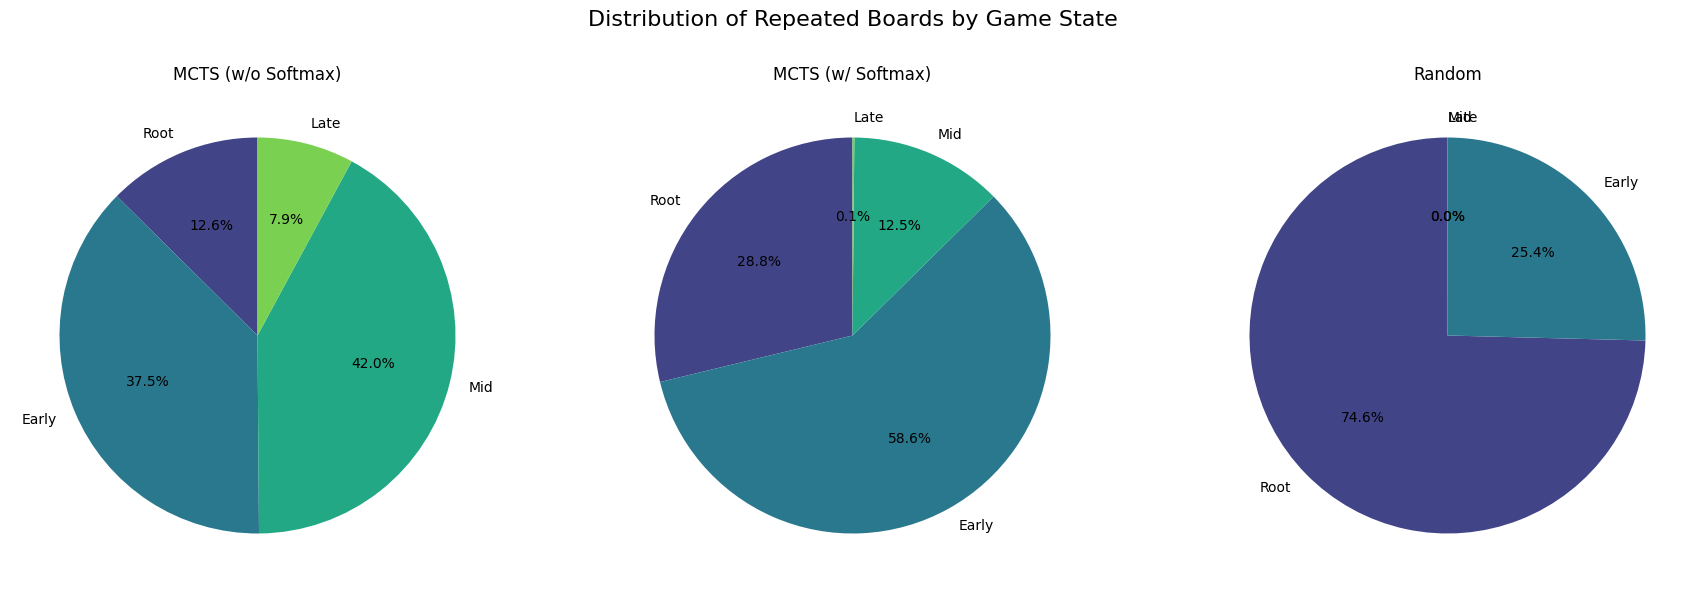

In [9]:
# Function to count repeated boards by state
def get_repeated_counts(state_datasets):
    repeated_counts = []
    for df_state in state_datasets:
        total = len(df_state)
        unique = df_state['board_string'].nunique()
        repeated = total - unique
        repeated_counts.append(repeated)
    return repeated_counts

# Get repeated counts for each dataset type
mcts_repeated = get_repeated_counts(mcts_state_datasets)
soft_repeated = get_repeated_counts(soft_state_datasets)
random_repeated = get_repeated_counts(random_state_datasets)

# Dataset titles
titles = ['MCTS (w/o Softmax)', 'MCTS (w/ Softmax)', 'Random']
repeated_lists = [mcts_repeated, soft_repeated, random_repeated]

# Plot the 3 pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, ax in enumerate(axes):
    ax.pie(
        repeated_lists[i],
        labels=state_labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('viridis', len(state_labels))
    )
    ax.set_title(f'{titles[i]}')

fig.suptitle('Distribution of Repeated Boards by Game State', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Space for main title
plt.show()

**Note:** It makes sense that the states with the most repeated states are the initial ones, since not only is the number of possible permutations smaller, but it's also in the early stages that more equivalent (i.e., symmetrical) boards are likely to appear.


## Differences in Suggested Moves (10k–50k Iterations)

In [10]:
# Check if all iterations suggest the same move
def check_same_move_all(df, name):
    same_all = df[iterations].nunique(axis=1) == 1
    percent_same = same_all.mean() * 100
    print(f"[{name}] All iterations suggest the same move in {percent_same:.2f}% of the cases.")

# Apply to MCTS without Softmax and with Softmax
check_same_move_all(mcts_df, "MCTS (w/o Softmax)")
check_same_move_all(soft_df, "MCTS (w/ Softmax)")


[MCTS (w/o Softmax)] All iterations suggest the same move in 66.61% of the cases.
[MCTS (w/ Softmax)] All iterations suggest the same move in 68.76% of the cases.


In [11]:
print("### MCTS (w/o Softmax) ###")
aux = 10
for i in diff_iters:
    comparison = mcts_df[i] != mcts_df['50kIter']
    percent_diff = comparison.mean() * 100
    print(f"The move suggested at {aux}k differs from 50k in {percent_diff:.2f}% of the cases.")
    aux += 10

print("")
print("### MCTS (w/ Softmax) ###")
aux = 10
for j in diff_iters:
    comparison = soft_df[j] != soft_df['50kIter']
    percent_diff = comparison.mean() * 100
    print(f"The move suggested at {aux}k differs from 50k in {percent_diff:.2f}% of the cases.")
    aux += 10

### MCTS (w/o Softmax) ###
The move suggested at 10k differs from 50k in 29.65% of the cases.
The move suggested at 20k differs from 50k in 21.07% of the cases.
The move suggested at 30k differs from 50k in 13.07% of the cases.
The move suggested at 40k differs from 50k in 7.17% of the cases.

### MCTS (w/ Softmax) ###
The move suggested at 10k differs from 50k in 27.49% of the cases.
The move suggested at 20k differs from 50k in 18.73% of the cases.
The move suggested at 30k differs from 50k in 11.23% of the cases.
The move suggested at 40k differs from 50k in 6.03% of the cases.


In [12]:
print("### MCTS (w/o Softmax) ###")
for i in range(len(iterations) - 1):
    col_a = iterations[i]
    col_b = iterations[i + 1]
    diffs = (mcts_df[col_a] != mcts_df[col_b]).sum()
    print(f"Changes from {col_a} → {col_b}: {diffs} times ({(diffs / len(mcts_df)) * 100:.2f}%)")

print("")
print("### MCTS (w/ Softmax) ###")
for j in range(len(iterations) - 1):
    col_a = iterations[j]
    col_b = iterations[j + 1]
    diffs = (soft_df[col_a] != soft_df[col_b]).sum()
    print(f"Changes from {col_a} → {col_b}: {diffs} times ({(diffs / len(soft_df)) * 100:.2f}%)")

### MCTS (w/o Softmax) ###
Changes from 10kIter → 20kIter: 14259 times (16.76%)
Changes from 20kIter → 30kIter: 10759 times (12.65%)
Changes from 30kIter → 40kIter: 7452 times (8.76%)
Changes from 40kIter → 50kIter: 6096 times (7.17%)

### MCTS (w/ Softmax) ###
Changes from 10kIter → 20kIter: 13863 times (16.66%)
Changes from 20kIter → 30kIter: 9674 times (11.63%)
Changes from 30kIter → 40kIter: 6447 times (7.75%)
Changes from 40kIter → 50kIter: 5019 times (6.03%)


### Distribution of Suggested Move Differences (vs 50k) by Game State

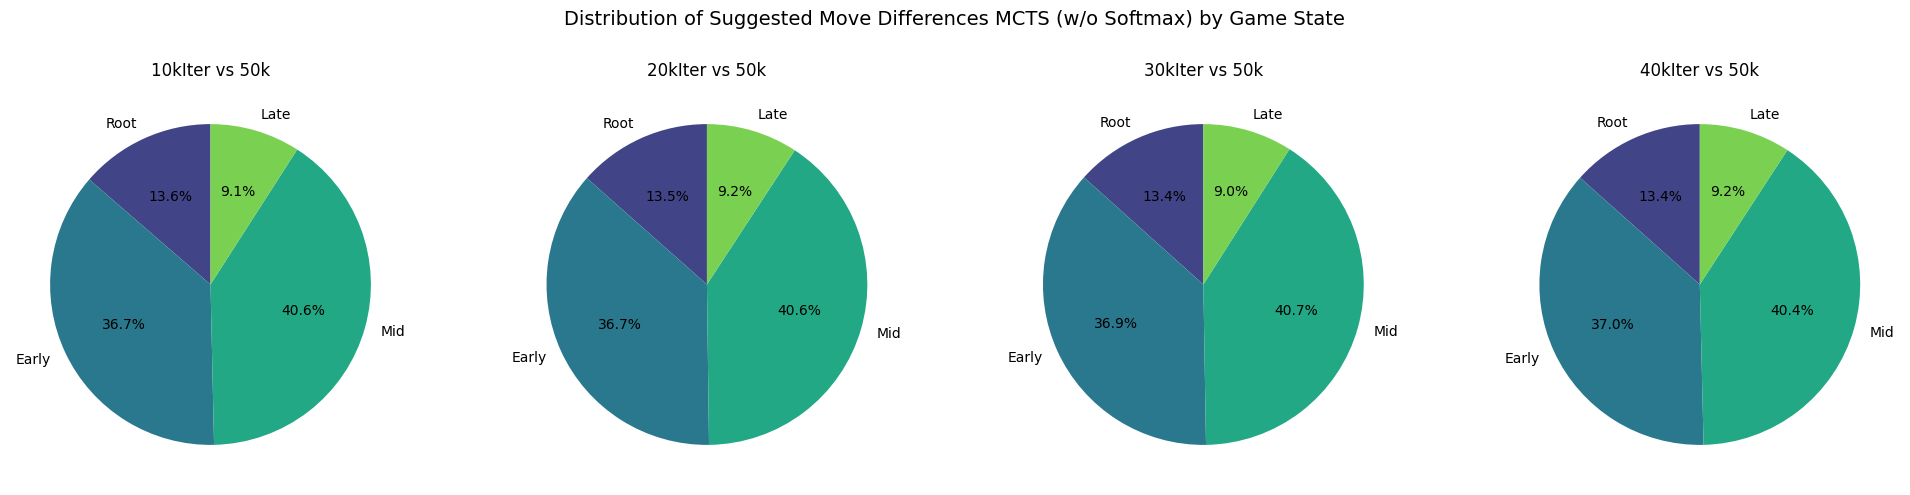

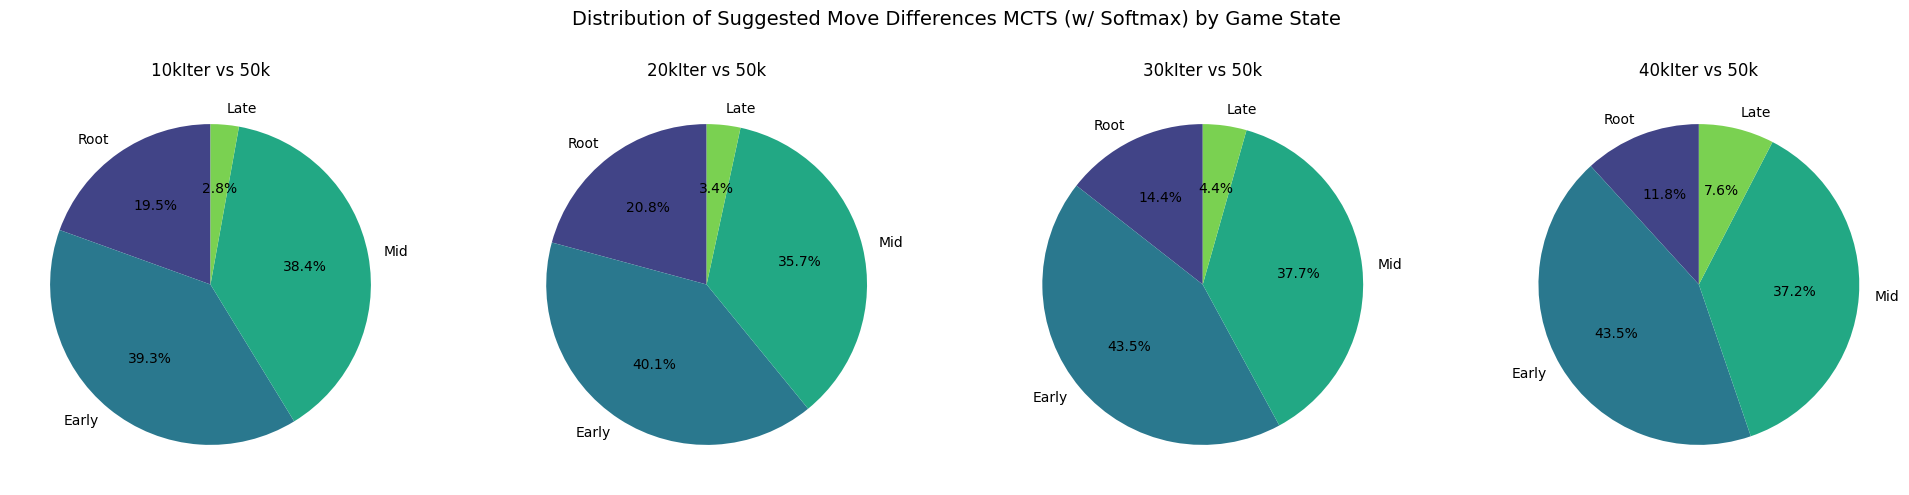

In [13]:
# Game states and associated datasets
mcts_game_states = {
    'root': mcts_root_df,
    'early': mcts_early_df,
    'mid': mcts_mid_df,
    'late': mcts_late_df
}

soft_game_states = {
    'root': soft_root_df,
    'early': soft_early_df,
    'mid': soft_mid_df,
    'late': soft_late_df
}

# Function to create pie chart figures
def plot_state_diffs(game_states, title_prefix):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    for idx, iter_col in enumerate(diff_iters):
        state_counts = []
        for state_name, state_df in game_states.items():
            diff = (state_df[iter_col] != state_df['50kIter']).sum()
            state_counts.append(diff)

        axes[idx].pie(
            state_counts,
            labels=state_labels,
            autopct='%1.1f%%',
            startangle=90,
            colors=sns.color_palette('viridis', len(state_labels))
        )
        axes[idx].set_title(f'{iter_col} vs 50k')

    plt.suptitle(f'Distribution of Suggested Move Differences {title_prefix} by Game State', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

# Generate the two separate figures in one block
plot_state_diffs(mcts_game_states, 'MCTS (w/o Softmax)')
plot_state_diffs(soft_game_states, 'MCTS (w/ Softmax)')

## Divergence Heatmaps of Suggested Moves (vs 50k)

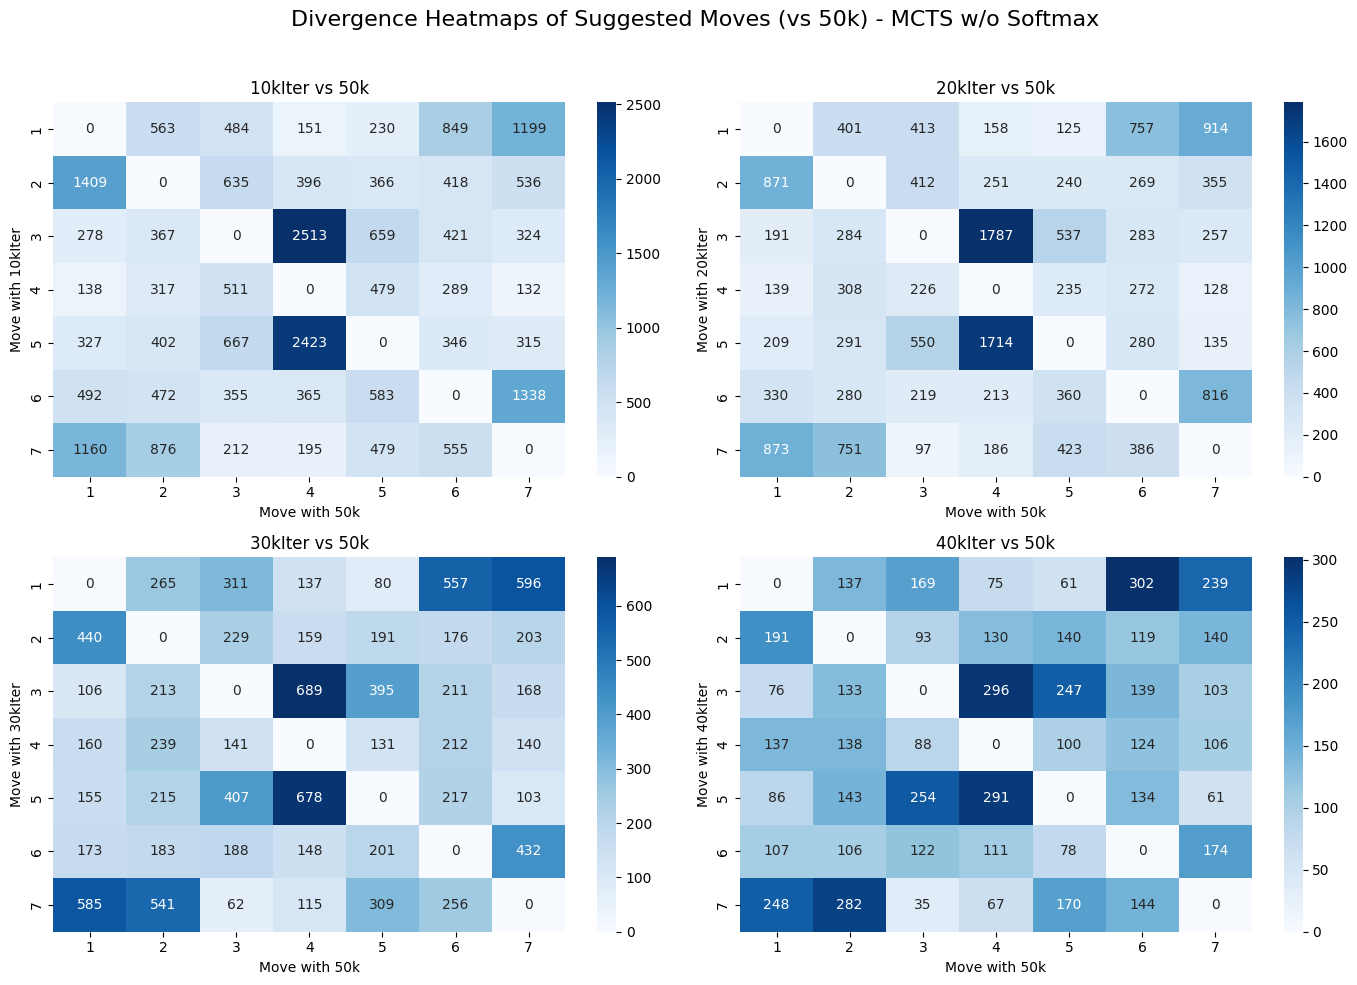

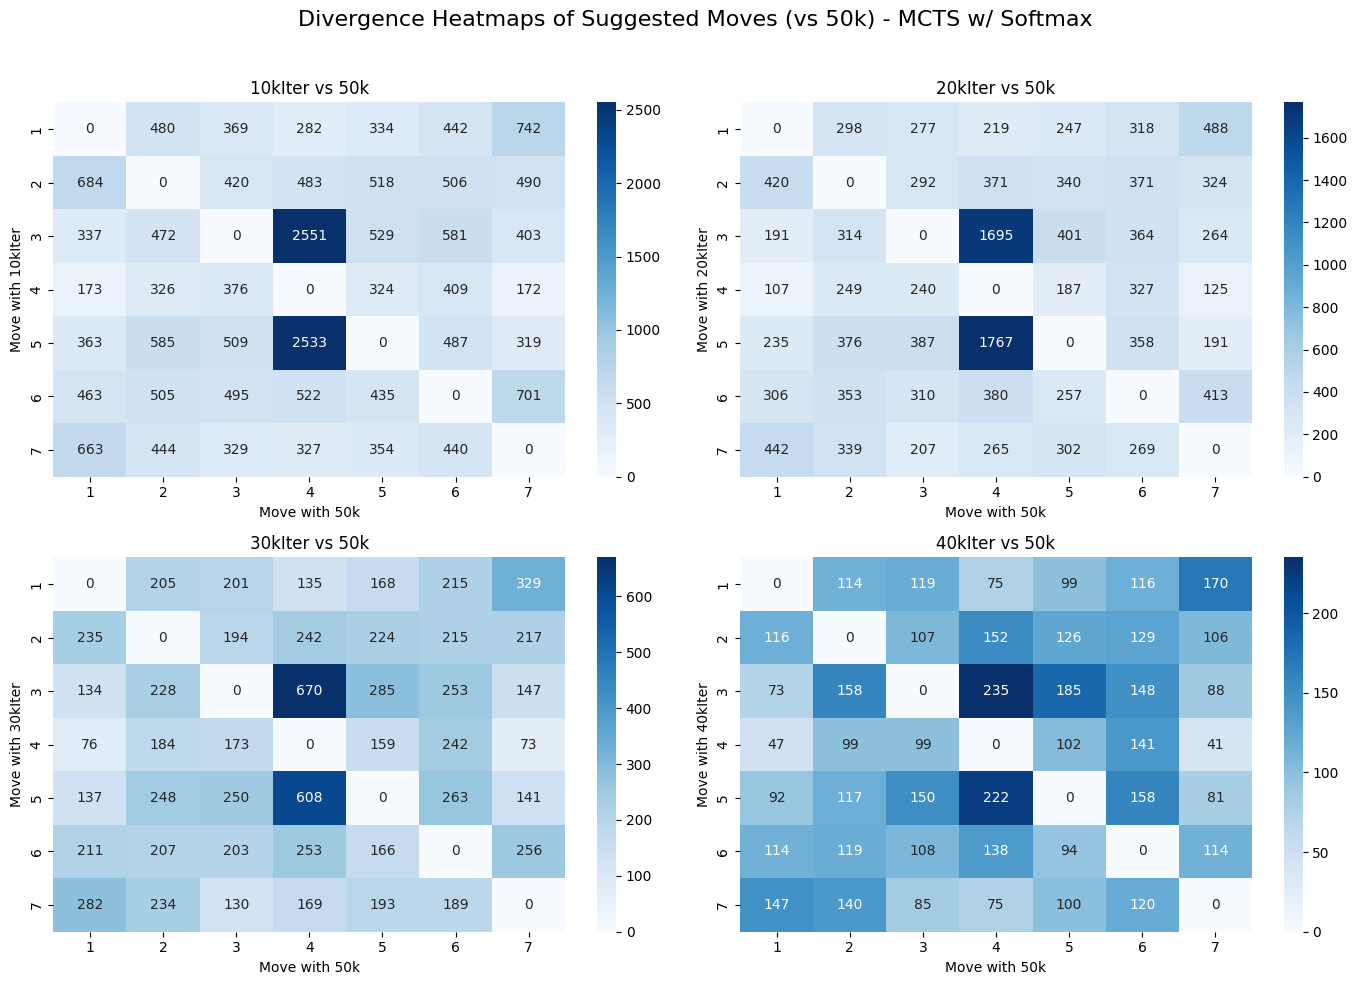

In [14]:
# Function to plot divergence heatmaps
def plot_heatmaps_vs_50k(df, title_prefix):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs = axs.flatten()

    for i, col in enumerate(diff_iters):
        # Filter cases where the move differs
        mask = df[col] != df['50kIter']
        diff_df = df[mask]

        # Create confusion matrix
        heatmap_data = pd.crosstab(diff_df[col], diff_df['50kIter'])

        # Plot the heatmap
        sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt='d', ax=axs[i])
        axs[i].set_xlabel('Move with 50k')
        axs[i].set_ylabel(f'Move with {col}')
        axs[i].set_title(f'{col} vs 50k')

    plt.suptitle(f'Divergence Heatmaps of Suggested Moves (vs 50k) - {title_prefix}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Generate heatmaps separately
plot_heatmaps_vs_50k(mcts_df, 'MCTS w/o Softmax')
plot_heatmaps_vs_50k(soft_df, 'MCTS w/ Softmax')


The preference for columns 3 or 5 over column 4 in MCTS with fewer iterations happens because those columns might seem more promising within a shorter search horizon, whereas move 4 (center) reveals its strategic advantage only with deeper exploration.

It's as if MCTS (10k) says: *"Winning quickly here looks good!"*

While MCTS (50k) says: *"Hold on, if I play in the center, my long-term chances improve!"*

## Statistical Analysis

### Chi-Squared Test

This statistical analysis compares different iteration counts of two Monte Carlo Tree Search (MCTS) algorithm versions: with and without Softmax. We use the Chi-Squared test at a significance level of **α = 0.05** (i.e., **95% confidence level**).

The critical value for rejecting the null hypothesis (no significant difference) is:

**Chi-Squared Critical Value:** 12.59159

We compare each lower iteration setting to the 50k iteration baseline.

MCTS (without Softmax)
| Comparison            | X² Statistic | p-value   | Decision (α = 0.05)             |
|-----------------------|--------------|-----------|---------------------------------|
| **10kIter vs 50kIter** | 885.92       | 2.2e-16   | ✅ **Reject H₀** – Strong difference |
| **20kIter vs 50kIter** | 443.19       | 2.2e-16   | ✅ **Reject H₀** – Strong difference |
| **30kIter vs 50kIter** | 56.595       | 2.206e-10 | ✅ **Reject H₀** – Moderate difference |
| **40kIter vs 50kIter** | 11.105       | 0.0794    | ❌ **Fail to reject H₀** – No significant difference |

MCTS (with Softmax)
| Comparison            | X² Statistic | p-value   | Decision (α = 0.05)             |
|-----------------------|--------------|-----------|---------------------------------|
| **10kIter vs 50kIter** | 1238.9       | 2.2e-16   | ✅ **Reject H₀** – Strong difference |
| **20kIter vs 50kIter** | 574.71       | 2.2e-16   | ✅ **Reject H₀** – Strong difference |
| **30kIter vs 50kIter** | 64.179       | 6.344e-12 | ✅ **Reject H₀** – Moderate difference |
| **40kIter vs 50kIter** | 7.394        | 0.2426    | ❌ **Fail to reject H₀** – No significant difference |  


  
  
 ### **Conclusions:**  
**Effect of Iteration Count:**  
In both algorithm versions, statistically significant performance differences are found when comparing up to 30k iterations with the 50k baseline. At 40k iterations, no significant difference is detected, suggesting that improvements begin to plateau as the number of iterations increases.

**Comparison Between Algorithm Versions:**  
The Softmax-enhanced MCTS shows larger chi-squared values across comparisons, indicating more pronounced performance shifts at lower iteration counts. This implies that Softmax may lead to a more responsive or sensitive algorithm in terms of performance scaling with additional iterations.

These insights may help in selecting iteration settings based on computational resources and desired performance, particularly in environments where efficiency is critical.

This statistical analysis compares different iteration counts of Monte Carlo Tree Search (MCTS) variants – both standard and with Softmax – across four stages: root, early, mid, and late.  
We apply the **Chi-Squared test** at a significance level of **α = 0.05 (95% confidence)**.

We compare each lower iteration setting to the 50k iteration baseline.

**Chi-Squared Critical Values:**
- df = 6 ⟶ **12.59159**
- df = 5 ⟶ **11.0705**
- df = 4 ⟶ **9.487729**


### MCTS (without Softmax)

| Comparison                  | X² Statistic | p-value     | Decision (α = 0.05)                    |
|----------------------------|--------------|-------------|----------------------------------------|
| mcts_root_10k vs 50k       | 143.27       | 2.04e-28    | ✅ **Reject H₀** – Strong difference    |
| mcts_root_20k vs 50k       | 80.05        | 3.49e-15    | ✅ **Reject H₀** – Strong difference    |
| mcts_root_30k vs 50k       | 9.44         | 0.15        | ❌ **Fail to reject H₀**                |
| mcts_root_40k vs 50k       | 1.70         | 0.94        | ❌ **Fail to reject H₀**                |
| mcts_early_10k vs 50k      | 310.96       | 3.67e-64    | ✅ **Reject H₀** – Strong difference    |
| mcts_early_20k vs 50k      | 143.50       | 1.83e-28    | ✅ **Reject H₀** – Strong difference    |
| mcts_early_30k vs 50k      | 14.67        | 0.023       | ✅ **Reject H₀** – Moderate difference  |
| mcts_early_40k vs 50k      | 4.15         | 0.656       | ❌ **Fail to reject H₀**                |
| mcts_mid_10k vs 50k        | 335.89       | 1.65e-69    | ✅ **Reject H₀** – Strong difference    |
| mcts_mid_20k vs 50k        | 171.30       | 2.39e-34    | ✅ **Reject H₀** – Strong difference    |
| mcts_mid_30k vs 50k        | 28.19        | 8.64e-05    | ✅ **Reject H₀** – Moderate difference  |
| mcts_mid_40k vs 50k        | 5.95         | 0.429       | ❌ **Fail to reject H₀**                |
| mcts_late_10k vs 50k       | 84.64        | 3.91e-16    | ✅ **Reject H₀** – Strong difference    |
| mcts_late_20k vs 50k       | 45.96        | 3.01e-08    | ✅ **Reject H₀** – Strong difference    |
| mcts_late_30k vs 50k       | 6.93         | 0.328       | ❌ **Fail to reject H₀**                |
| mcts_late_40k vs 50k       | 0.92         | 0.989       | ❌ **Fail to reject H₀**                |



### MCTS (with Softmax)

| Comparison                  | X² Statistic | p-value     | Decision (α = 0.05)                    |
|----------------------------|--------------|-------------|----------------------------------------|
| soft_root_10k vs 50k       | 3006.33      | ~0          | ✅ **Reject H₀** – Very strong diff     |
| soft_root_20k vs 50k       | 1697.77      | ~0          | ✅ **Reject H₀** – Very strong diff     |
| soft_root_30k vs 50k       | 259.81       | 5.00e-55    | ✅ **Reject H₀** – Strong difference    |
| soft_root_40k vs 50k       | 29.10        | 7.46e-06    | ✅ **Reject H₀** – Moderate difference  |
| soft_early_10k vs 50k      | 271.38       | 1.10e-55    | ✅ **Reject H₀** – Strong difference    |
| soft_early_20k vs 50k      | 114.93       | 1.89e-22    | ✅ **Reject H₀** – Strong difference    |
| soft_early_30k vs 50k      | 32.17        | 1.52e-05    | ✅ **Reject H₀** – Moderate difference  |
| soft_early_40k vs 50k      | 7.76         | 0.257       | ❌ **Fail to reject H₀**                |
| soft_mid_10k vs 50k        | 76.83        | 1.61e-14    | ✅ **Reject H₀** – Strong difference    |
| soft_mid_20k vs 50k        | 44.37        | 6.25e-08    | ✅ **Reject H₀** – Strong difference    |
| soft_mid_30k vs 50k        | 14.10        | 0.029       | ✅ **Reject H₀** – Moderate difference  |
| soft_mid_40k vs 50k        | 4.14         | 0.658       | ❌ **Fail to reject H₀**                |
| soft_late_10k vs 50k       | 3.60         | 0.731       | ❌ **Fail to reject H₀**                |
| soft_late_20k vs 50k       | 4.82         | 0.567       | ❌ **Fail to reject H₀**                |
| soft_late_30k vs 50k       | 5.11         | 0.530       | ❌ **Fail to reject H₀**                |
| soft_late_40k vs 50k       | 3.21         | 0.782       | ❌ **Fail to reject H₀**                |

**NOTE:** These results were calculated using R software.

### **Conclusions**

**Effect of Iteration Count:**  
Significant performance differences are consistently observed up to **30k iterations** for most comparisons, particularly in the early and mid stages. At **40k iterations**, results stabilize and show no statistically significant difference from the 50k baseline in many cases.

**Softmax vs. Standard MCTS:**  
The **Softmax variant** often shows stronger differences at lower iteration counts, suggesting a more sensitive adaptation to iteration changes, especially in the early stages. This implies it may benefit more from increased iterations at lower computational budgets.

**Effect of Game State (Root, Early, Mid, Late):**  
Across both MCTS variants, the **impact of iteration count is most pronounced in the root, early, and mid game states**, where decision branching is broader and search depth matters more. In contrast, **late-game states exhibit minimal performance differences**, indicating that fewer iterations may suffice once the game state is more constrained and deterministic.

These results guide informed choices in balancing performance and computation, particularly for iteration-constrained environments.


### Agreement

In [15]:
print("### Agreement vs 50kIter — MCTS (without Softmax) ###")
for col in diff_iters:
    match_rate = (mcts_df[col] == mcts_df[reference]).mean() * 100
    print(f"{col} vs {reference}: {match_rate:.2f}%")

print("-" * 40)

print("### Agreement vs 50kIter — MCTS (with Softmax) ###")
for col in diff_iters:
    match_rate = (soft_df[col] == soft_df[reference]).mean() * 100
    print(f"{col} vs {reference}: {match_rate:.2f}%")

### Agreement vs 50kIter — MCTS (without Softmax) ###
10kIter vs 50kIter: 70.35%
20kIter vs 50kIter: 78.93%
30kIter vs 50kIter: 86.93%
40kIter vs 50kIter: 92.83%
----------------------------------------
### Agreement vs 50kIter — MCTS (with Softmax) ###
10kIter vs 50kIter: 72.51%
20kIter vs 50kIter: 81.27%
30kIter vs 50kIter: 88.77%
40kIter vs 50kIter: 93.97%


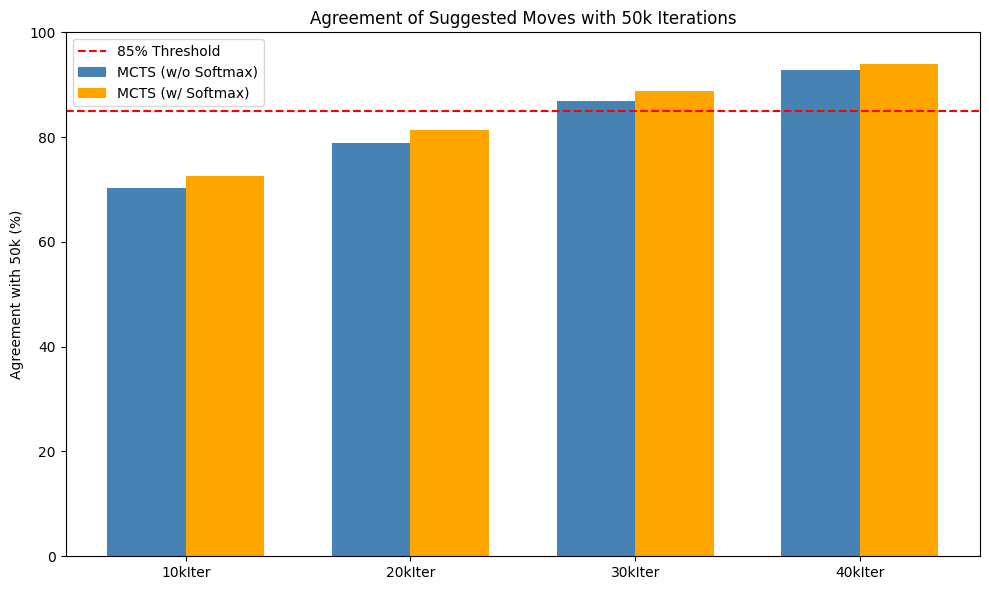

In [16]:
# Calculate agreement rates
mcts_match_rates = [(mcts_df[col] == mcts_df[reference]).mean() * 100 for col in diff_iters]
soft_match_rates = [(soft_df[col] == soft_df[reference]).mean() * 100 for col in diff_iters]

# Plot
import numpy as np
x = np.arange(len(diff_iters))  # positions on the x-axis
width = 0.35  # bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, mcts_match_rates, width, label='MCTS (w/o Softmax)', color='steelblue')
plt.bar(x + width/2, soft_match_rates, width, label='MCTS (w/ Softmax)', color='orange')

# Reference line for 85%
plt.axhline(85, color='red', linestyle='--', label='85% Threshold')

# Axes and title
plt.xticks(x, diff_iters)
plt.ylabel('Agreement with 50k (%)')
plt.title('Agreement of Suggested Moves with 50k Iterations')
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()



The results show that agreement with the decisions made at 50k iterations increases steadily with more simulations.

This suggests that the algorithm gradually converges toward more consistent decisions as the number of iterations increases. However, the improvements become less significant over time. Since agreement rates above **85%** typically indicate diminishing returns, using **30k or 40k iterations** offers a good trade-off between performance and computational cost.

In [17]:
print(">>> Agreement percentage by game state and iteration - MCTS (w/o Softmax)\n")

for label, df_state in zip(state_labels, mcts_state_datasets):
    print(f"--- {label.upper()} ---")
    for col in diff_iters:
        match = (df_state[col] == df_state[reference]).mean() * 100
        print(f"{col} vs {reference}: {match:.2f}%")
    print()

print("-" * 80)
print("")

print(">>> Agreement percentage by game state and iteration - MCTS (w/ Softmax)\n")

for label, df_state in zip(state_labels, soft_state_datasets):
    print(f"--- {label.upper()} ---")
    for col in diff_iters:
        match = (df_state[col] == df_state[reference]).mean() * 100
        print(f"{col} vs {reference}: {match:.2f}%")
    print()

>>> Agreement percentage by game state and iteration - MCTS (w/o Softmax)

--- ROOT ---
10kIter vs 50kIter: 69.94%
20kIter vs 50kIter: 78.92%
30kIter vs 50kIter: 87.04%
40kIter vs 50kIter: 92.85%

--- EARLY ---
10kIter vs 50kIter: 70.58%
20kIter vs 50kIter: 79.08%
30kIter vs 50kIter: 86.98%
40kIter vs 50kIter: 92.83%

--- MID ---
10kIter vs 50kIter: 70.37%
20kIter vs 50kIter: 78.94%
30kIter vs 50kIter: 86.90%
40kIter vs 50kIter: 92.85%

--- LATE ---
10kIter vs 50kIter: 69.81%
20kIter vs 50kIter: 78.23%
30kIter vs 50kIter: 86.81%
40kIter vs 50kIter: 92.61%

--------------------------------------------------------------------------------

>>> Agreement percentage by game state and iteration - MCTS (w/ Softmax)

--- ROOT ---
10kIter vs 50kIter: 60.21%
20kIter vs 50kIter: 71.08%
30kIter vs 50kIter: 87.96%
40kIter vs 50kIter: 94.72%

--- EARLY ---
10kIter vs 50kIter: 70.84%
20kIter vs 50kIter: 79.70%
30kIter vs 50kIter: 86.80%
40kIter vs 50kIter: 92.91%

--- MID ---
10kIter vs 50kIter: 73.9

**Conclusion**

The agreement between lower iteration counts and the 50k iteration reference consistently increases across all game states for both MCTS variants (with and without Softmax). In ROOT, EARLY, and MID states, lower iteration counts (e.g., 10k and 20k) show moderate agreement—typically between **60–80%**—reflecting greater variability and uncertainty in move selection due to limited search depth.

However, from **30k iterations onward**, agreement rises sharply—often **exceeding 85%**—which suggests that additional iterations beyond this point contribute progressively less to changing the predicted best move. This convergence is particularly noticeable in the **LATE game state**, where even **10k iterations yield over 90% agreement**, likely due to the reduced complexity and more deterministic nature of endgame scenarios.

Notably, **MCTS without Softmax** demonstrates **more stable and consistent agreement across all states**, while **MCTS with Softmax** shows **greater sensitivity to the game phase**, especially in early states (e.g., ROOT), where it starts with lower agreement but converges more sharply at higher iteration counts.

Overall, these results suggest that while increasing the number of iterations improves stability and consistency of move prediction, **30k iterations appears to be a practical and efficient threshold**, balancing performance gains with computational cost.


## Chi-Squared vs Agreement

*Do they contradict each other?*  


No — they **complement** each other.
While **Chi-Squared tests** reveal whether the **underlying policy distributions differ**, **agreement metrics** measure how often the **final actions match**. You can have the same move selected even if the search policies are still different — and that's exactly what these two metrics help uncover from different angles.



### **MCTS without Softmax**

📊 **Agreement**

* Smooth and consistent rise:
  **10k: 70.35% → 40k: 92.83%**
* Stable across all game states (ROOT, EARLY, MID, LATE)

📈 **Chi-Squared**

* Strong differences at **10k, 20k, 30k** (p < 0.001)
* **No significant difference at 40k** (p = 0.0794)

✅ **Conclusion**

* Agreement shows **actions stabilize early**, even at 10k.
* Chi² confirms **policy convergence at 40k**.
* Clear, gradual convergence — **40k iterations are sufficient** for reliable behavior.



### **MCTS with Softmax**

📊 **Agreement**

* Also rises:
  **10k: 72.51% → 40k: 93.97%**
* Less uniform:

  * ROOT starts low (60.21%), LATE is stable (>91%)

📈 **Chi-Squared**

* Strong differences up to **30k** (p ≪ 0.001)
* **No significant difference at 40k** (p = 0.2426)
* Larger X² values suggest **Softmax amplifies small differences** in visit counts

⚠️ **Conclusion**

* Agreement improves, but **can hide internal variation**
* Chi² shows that only at **40k iterations does the policy stabilize**
* Softmax requires **more simulations** to reach consistent internal distributions


### **Final Takeaway:** *How Many Iterations Are Enough?*

* Agreement becomes high (>92%) at 40k iterations in both variants
* Chi-Squared tests confirm that **40k is the point where policies no longer differ significantly** from the 50k baseline

### **Bottom line**:

- **40k iterations appear to be a practical threshold**, balancing behavioral stability and computational efficiency. While 50k provides marginal refinements, they may not justify the cost. Unless extremely fine-grained behavior is required (e.g., in late-game precision), **40k iterations should suffice** in most use cases.  

**Note:** We simulated 100 games of MCTS (30k) vs MCTS (50k), and MCTS (30k) won 88 of them. Even considering the significant advantage of playing first, these results are quite close to those of MCTS (50k) vs MCTS (50k), where the first player won 93 games. In contrast, for MCTS (10k) vs MCTS (50k), not even the first-player advantage was enough, with MCTS (10k) winning only 25 games.


## Fun Facts

### **Which column?**

### Distribution of Moves Suggested by MCTS without Softmax (10k–50k Iterations)

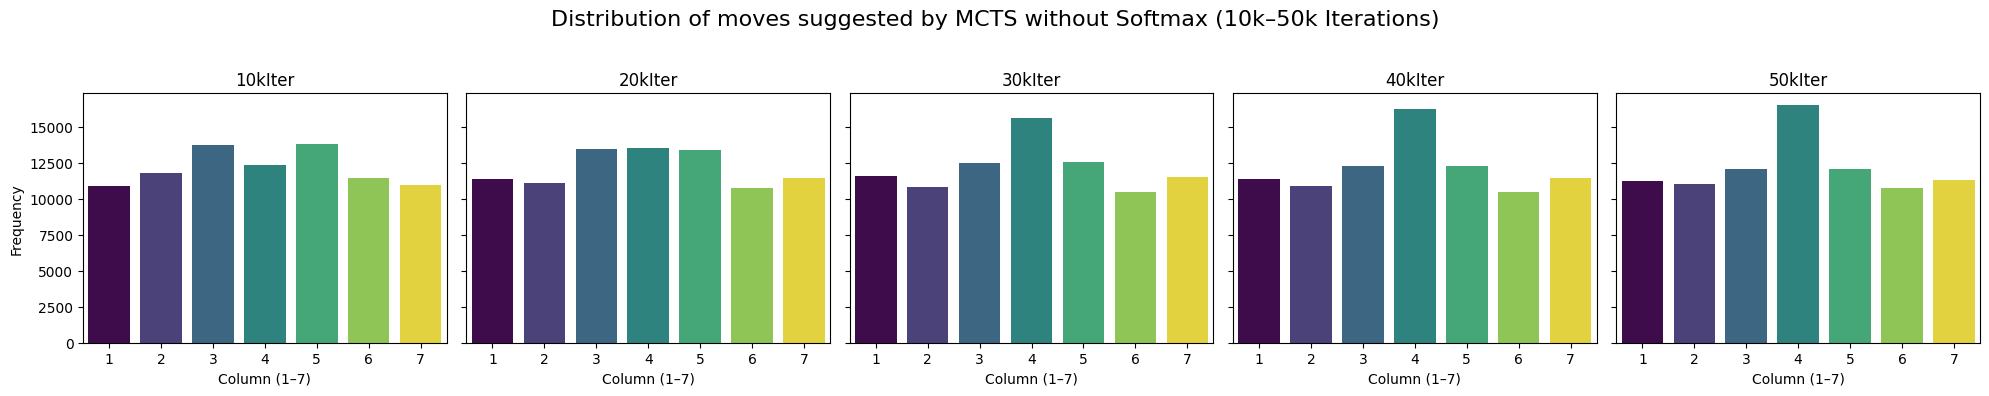

In [18]:
# Create figure and axes (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# Generate each plot
for i, col in enumerate(iterations):
    sns.countplot(x=col, hue=col, data=mcts_df, palette='viridis', legend=False, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Column (1–7)')
    if i == 0:
        axes[i].set_ylabel('Frequency')
    else:
        axes[i].set_ylabel('')

# Adjust layout
fig.suptitle('Distribution of moves suggested by MCTS without Softmax (10k–50k Iterations)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Distribution of Moves Suggested by MCTS with Softmax (10k–50k Iterations)

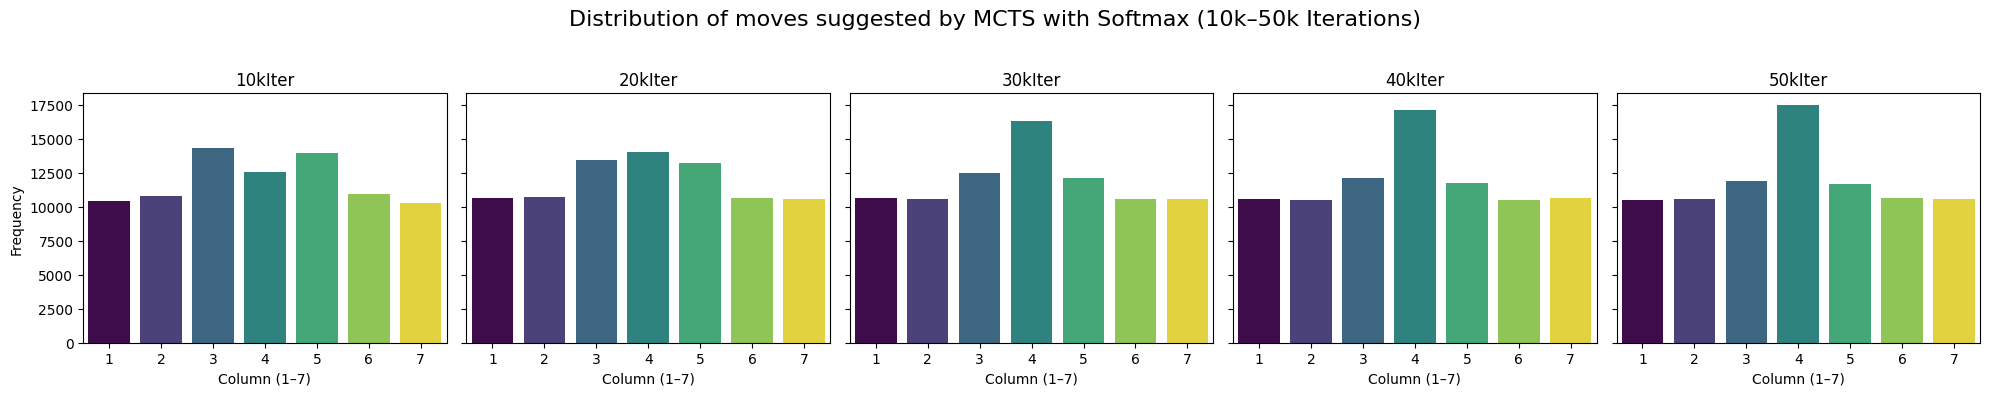

In [19]:
# Create figure and axes (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# Generate each plot
for i, col in enumerate(iterations):
    sns.countplot(x=col, hue=col, data=soft_df, palette='viridis', legend=False, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Column (1–7)')
    if i == 0:
        axes[i].set_ylabel('Frequency')
    else:
        axes[i].set_ylabel('')

# Adjust layout
fig.suptitle('Distribution of moves suggested by MCTS with Softmax (10k–50k Iterations)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Note:**
There are 69 different winning positions:

* 24 horizontal
* 21 vertical
* 12+12 diagonal

Out of these 69 ways to win, 51 involve placing at least one piece in the center column (4). This explains the tendency for the algorithm, as the number of iterations increases, to become aware of this and increasingly favor playing in that column.


### Left vs Right

In [20]:
def analyze_piece_distribution(df, label):
    # Initialize counters for pieces on the left, right, and center
    left_pieces = 0
    right_pieces = 0
    center_pieces = 0
    total_pieces = 0

    # Board column mappings to dataset indices
    left_indices = [0, 1, 2, 7, 8, 9, 14, 15, 16, 21, 22, 23, 28, 29, 30, 35, 36, 37]   # Columns 1, 2, 3
    right_indices = [4, 5, 6, 11, 12, 13, 18, 19, 20, 25, 26, 27, 32, 33, 34, 39, 40, 41]  # Columns 5, 6, 7
    center_indices = [3, 10, 17, 24, 31, 38]  # Column 4

    # Iterate through each row to count pieces
    for idx in range(len(df)):
        row = df.iloc[idx, :42].values  # First 42 columns represent the board

        left_pieces += np.sum(row[left_indices] != '-')
        right_pieces += np.sum(row[right_indices] != '-')
        center_pieces += np.sum(row[center_indices] != '-')
        total_pieces += np.sum(row != '-')

    # Calculate percentages
    if total_pieces > 0:
        percent_left = (left_pieces / total_pieces) * 100
        percent_right = (right_pieces / total_pieces) * 100
        percent_center = (center_pieces / total_pieces) * 100
    else:
        percent_left = percent_right = percent_center = 0

    print("-" * 40)
    print(f"### {label} ###")
    print(f"Pieces on the left: {left_pieces} ({percent_left:.2f}%)")
    print(f"Pieces on the right: {right_pieces} ({percent_right:.2f}%)")
    print(f"Pieces in the center: {center_pieces} ({percent_center:.2f}%)")

analyze_piece_distribution(mcts_df, 'MCTS w/o Softmax')
analyze_piece_distribution(soft_df, 'MCTS w/ Softmax')
analyze_piece_distribution(random_df, 'Random')
print("-" * 40)

----------------------------------------
### MCTS w/o Softmax ###
Pieces on the left: 416934 (34.41%)
Pieces on the right: 415262 (34.27%)
Pieces in the center: 379519 (31.32%)
----------------------------------------
### MCTS w/ Softmax ###
Pieces on the left: 433122 (35.01%)
Pieces on the right: 435159 (35.18%)
Pieces in the center: 368718 (29.81%)
----------------------------------------
### Random ###
Pieces on the left: 566450 (43.03%)
Pieces on the right: 566663 (43.04%)
Pieces in the center: 183348 (13.93%)
----------------------------------------


In [21]:
def analyze_side_preferences(df, label, results):
    all_moves = pd.concat([df[col] for col in results], ignore_index=True)
    
    left_moves = all_moves.isin([1, 2, 3]).sum()
    right_moves = all_moves.isin([5, 6, 7]).sum()
    center_moves = all_moves.isin([4]).sum()
    total_considered = left_moves + right_moves + center_moves
    
    percent_left = (left_moves / total_considered) * 100 if total_considered > 0 else 0
    percent_right = (right_moves / total_considered) * 100 if total_considered > 0 else 0
    percent_center = (center_moves / total_considered) * 100 if total_considered > 0 else 0
    
    print("-" * 40)
    print(f"[{label}]")
    print(f"Moves to the left (columns 1–3): {left_moves} {percent_left:.2f}%")
    print(f"Moves to the right (columns 5–7): {right_moves} {percent_right:.2f}%")
    print(f"Moves to the center (column 4): {center_moves} {percent_center:.2f}%")

# Apply the function to the main datasets
analyze_side_preferences(mcts_df, "MCTS (without Softmax)", iterations)
analyze_side_preferences(soft_df, "MCTS (with Softmax)", iterations)
analyze_side_preferences(random_df, "Random", result)
print("-" * 40)

----------------------------------------
[MCTS (without Softmax)]
Moves to the left (columns 1–3): 176391 41.47%
Moves to the right (columns 5–7): 174777 41.09%
Moves to the center (column 4): 74212 17.45%
----------------------------------------
[MCTS (with Softmax)]
Moves to the left (columns 1–3): 170108 40.89%
Moves to the right (columns 5–7): 168535 40.51%
Moves to the center (column 4): 77397 18.60%
----------------------------------------
[Random]
Moves to the left (columns 1–3): 42621 47.89%
Moves to the right (columns 5–7): 28668 32.21%
Moves to the center (column 4): 17711 19.90%
----------------------------------------


**Note:** favoring one side in move selection does not necessarily mean that victories occur more often on that same side. In many cases, one side becomes overloaded because the player is actively avoiding moves on the other side, which could eventually lead to the opponent’s victory.